In [68]:
import pandas as pd
import numpy as np
from numpy import mean, std
import matplotlib.pyplot as plt
import pickle
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split,cross_val_score,LeaveOneOut,GridSearchCV, cross_val_score, cross_val_predict, train_test_split,StratifiedKFold, LeavePOut
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import Normalizer
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import math
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn.covariance import EmpiricalCovariance
from sklearn.metrics import f1_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.svm import SVC
from sklearn.datasets import make_classification
from sklearn.datasets import make_circles
from sklearn import preprocessing
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.cluster import KMeans
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingRegressor
import warnings


warnings.filterwarnings('ignore')

In [69]:
pd.set_option("display.max_rows", 500)

In [70]:
data = pd.read_csv('ss11-iz10-im16.csv')
data

,x1_values,sigma_values
0,0.0,-4.756562
1,0.5,-5.513695
2,1.0,-6.270828
3,1.5,-7.027961
4,2.0,-7.785094
5,2.5,-8.542227
6,3.0,-9.299359
7,3.5,-10.056492
8,4.0,-10.813625
9,4.5,-11.570758


In [71]:
data.columns[data.isnull().any()]

Index([], dtype='object')

In [72]:
data.isna().any()

x1_values       False
sigma_values    False
dtype: bool

In [73]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
x1_values,220.0,50.000000,28.940578,0.000000,25.000000,50.000000,75.000000,100.000000
sigma_values,220.0,-46.711003,20.596097,-69.999731,-65.444986,-52.480429,-30.564634,-4.756562


In [74]:
data.sigma_values.value_counts()

-69.999731    2
-69.298895    2
-58.792318    2
-52.480429    2
-58.792319    2
-44.813108    2
-63.693067    2
-44.813108    2
-35.583644    2
-63.693067    2
-35.583643    2
-67.196906    2
-25.545624    2
-25.545624    2
-67.196906    2
-52.480429    2
-12.327892    2
-12.327891    2
-69.298895    2
-67.407105    1
-58.161130    1
-68.878497    1
-60.262543    1
-69.088696    1
-59.772468    1
-59.282393    1
-69.368979    1
-57.529941    1
-61.242693    1
-56.898752    1
-69.439062    1
-56.267563    1
-55.636374    1
-55.005185    1
-69.509146    1
-54.373996    1
-60.752618    1
-62.222842    1
-61.732768    1
-65.094603    1
-67.827503    1
-66.846522    1
-68.037702    1
-66.496139    1
-66.145755    1
-65.795371    1
-65.444987    1
-64.744219    1
-67.617304    1
-53.742807    1
-68.247901    1
-64.043451    1
-68.458099    1
-63.202992    1
-68.668298    1
-62.712917    1
-64.393835    1
-49.413501    1
-53.111618    1
-14.971439    1
-27.553228    1
-26.549426    1
-24.2238

In [75]:
data.values

array([[  0.  ,  -4.76],
       [  0.5 ,  -5.51],
       [  1.  ,  -6.27],
       [  1.5 ,  -7.03],
       [  2.  ,  -7.79],
       [  2.5 ,  -8.54],
       [  3.  ,  -9.3 ],
       [  3.5 , -10.06],
       [  4.  , -10.81],
       [  4.5 , -11.57],
       [  5.  , -12.33],
       [  5.  , -12.33],
       [  5.5 , -13.65],
       [  6.  , -14.97],
       [  6.5 , -16.29],
       [  7.  , -17.61],
       [  7.5 , -18.94],
       [  8.  , -20.26],
       [  8.5 , -21.58],
       [  9.  , -22.9 ],
       [  9.5 , -24.22],
       [ 10.  , -25.55],
       [ 10.  , -25.55],
       [ 10.5 , -26.55],
       [ 11.  , -27.55],
       [ 11.5 , -28.56],
       [ 12.  , -29.56],
       [ 12.5 , -30.56],
       [ 13.  , -31.57],
       [ 13.5 , -32.57],
       [ 14.  , -33.58],
       [ 14.5 , -34.58],
       [ 15.  , -35.58],
       [ 15.  , -35.58],
       [ 15.5 , -36.51],
       [ 16.  , -37.43],
       [ 16.5 , -38.35],
       [ 17.  , -39.28],
       [ 17.5 , -40.2 ],
       [ 18.  , -41.12],


In [76]:
from sklearn.preprocessing import StandardScaler

# DataFrame'i NumPy dizisine çevirme
data_np = data.values

# StandardScaler kullanarak standardizasyon
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_np)

# Sonucu tekrar DataFrame'e çevirme
data_scaled_df = pd.DataFrame(data_scaled, columns=data.columns)

# İlk birkaç satırı kontrol etme
print(data_scaled_df.head())

   x1_values  sigma_values
0  -1.731618      2.041655
1  -1.714302      2.004810
2  -1.696986      1.967965
3  -1.679669      1.931120
4  -1.662353      1.894275


In [77]:
X = data_scaled_df.iloc[:, :1].values
y = data_scaled_df.iloc[:,1].values

In [78]:
X.shape, y.shape

((220, 1), (220,))

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [80]:
rf_reg = RandomForestRegressor(n_estimators = 250 , criterion='squared_error',random_state = 42) 
rf_reg.fit(X_train, y_train)

RandomForestRegressor(n_estimators=250, random_state=42)

In [81]:
y_pred = rf_reg.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[-1.   -1.  ]
 [-0.72 -0.71]
 [-1.04 -1.05]
 [ 0.25  0.27]
 [ 1.43  1.42]
 [-1.12 -1.12]
 [-0.04 -0.02]
 [ 1.65  1.67]
 [-0.8  -0.8 ]
 [-0.81 -0.83]
 [-1.1  -1.1 ]
 [ 0.61  0.64]
 [ 0.7   0.69]
 [ 1.68  1.71]
 [-0.6  -0.61]
 [ 1.99  2.  ]
 [ 0.1   0.09]
 [ 1.18  1.22]
 [ 1.04  1.03]
 [-0.58 -0.59]
 [ 0.58  0.64]
 [-1.07 -1.08]
 [ 1.69  1.71]
 [ 0.84  0.88]
 [-1.04 -1.04]
 [ 1.18  1.22]
 [-1.1  -1.09]
 [ 1.35  1.35]
 [ 0.08  0.06]
 [-0.59 -0.59]
 [-1.13 -1.13]
 [-0.28 -0.28]
 [-1.13 -1.13]
 [ 1.01  0.98]
 [-0.76 -0.75]
 [-1.13 -1.13]
 [-0.92 -0.91]
 [-0.9  -0.89]
 [-0.83 -0.84]
 [-1.11 -1.11]
 [-0.97 -0.98]
 [ 0.86  0.83]
 [-1.1  -1.1 ]
 [-1.06 -1.07]
 [-0.86 -0.86]
 [ 1.95  1.97]
 [-1.12 -1.12]
 [-0.86 -0.86]
 [-1.08 -1.09]
 [-0.32 -0.34]
 [ 1.9   1.89]
 [ 0.34  0.32]
 [ 0.99  0.93]
 [ 0.48  0.5 ]
 [-0.93 -0.91]]


In [82]:
r2_score(y_test, y_pred)

0.9996320708953808

In [83]:
# Use test and show results of test set
y_hat = rf_reg.predict(X)
mae = metrics.mean_absolute_error(y,y_hat)
mse = metrics.mean_squared_error(y,y_hat)
mape = np.mean(np.abs((y - y_hat) / y)) * 100
print ("TEST SET")
print ("========")
print ("MAE:                ", mae)
print ("RMSE:               ", math.sqrt(mse))
print ("MAPE:               ", mape)
print ("r2:                 ", rf_reg.score(X,y))

TEST SET
MAE:                 0.008493267792352831
RMSE:                0.012847561743522173
MAPE:                2.846097472719923
r2:                  0.9998349401572464


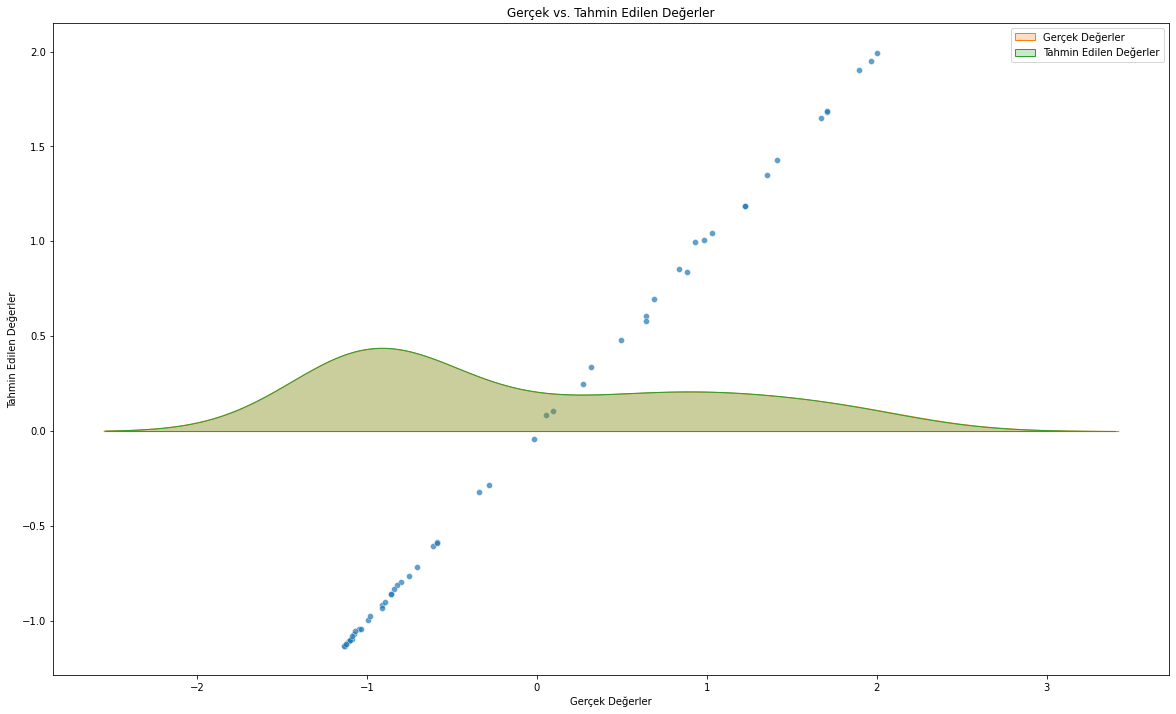

In [84]:
# Gerçek ve tahmin edilen değerleri içeren DataFrame
result_df = pd.DataFrame({'Gerçek Değerler': y_test, 'Tahmin Edilen Değerler': y_pred})

# Scatter plot çizimi
plt.figure(figsize=(20, 12))
sns.scatterplot(x='Gerçek Değerler', y='Tahmin Edilen Değerler', data=result_df, palette='viridis', edgecolor='w', alpha=0.7)
plt.title('Gerçek vs. Tahmin Edilen Değerler')
plt.xlabel('Gerçek Değerler')
plt.ylabel('Tahmin Edilen Değerler')

# Gerçek değerlerin yoğunluk grafiği
sns.kdeplot(result_df['Gerçek Değerler'], label='Gerçek Değerler', shade=True)

# Tahmin edilen değerlerin yoğunluk grafiği
sns.kdeplot(result_df['Tahmin Edilen Değerler'], label='Tahmin Edilen Değerler', shade=True)

plt.legend()
plt.show() 

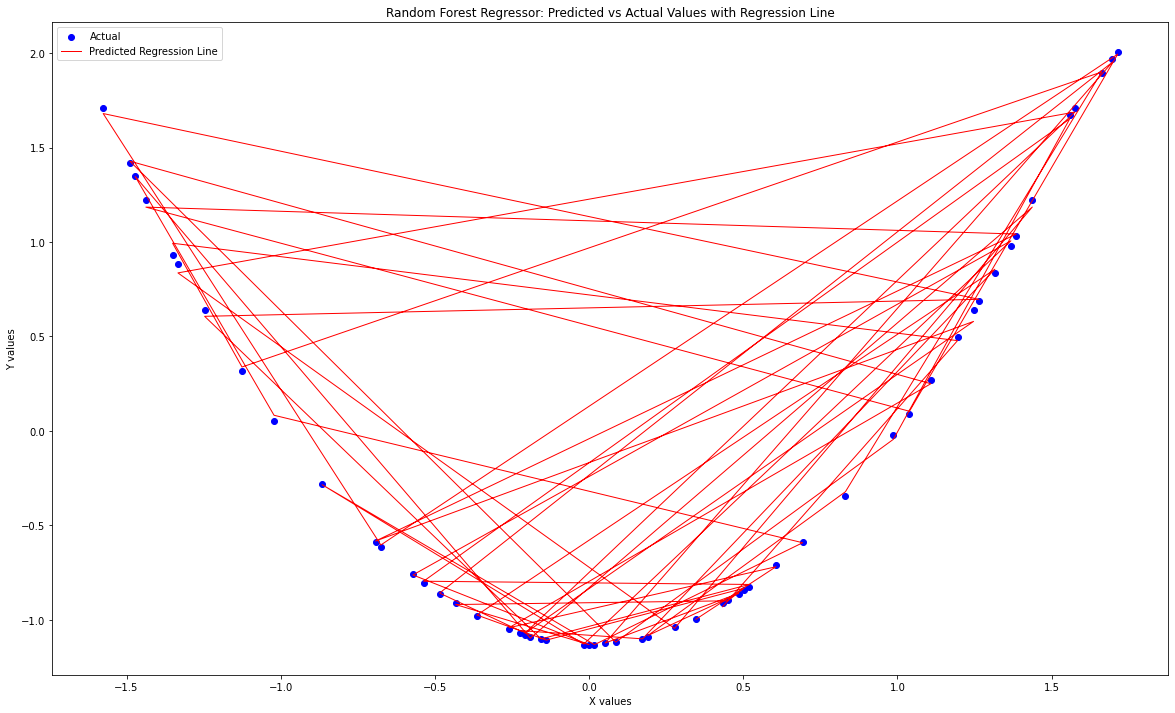

In [85]:
df_results = pd.DataFrame({'Predicted': y_pred, 'Actual': y_test})

plt.figure(figsize=(20, 12))
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', linewidth=1, label='Predicted Regression Line')
plt.xlabel('X values')
plt.ylabel('Y values')
plt.title('Random Forest Regressor: Predicted vs Actual Values with Regression Line')
plt.legend()
plt.show()


### XGBoost

In [86]:
from xgboost import XGBRegressor


xgb = XGBRegressor(n_estimators=220,
                    learning_rate = 0.03,
                    max_depth = 7,
                    random_state=42,
                    n_jobs = -1,
                    reg_lambda=0.995,
                    )

xgb.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.03, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=7, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=220, n_jobs=-1, num_parallel_tree=None,
             predictor=None, random_state=42, ...)

In [87]:
y_pred = xgb.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[-0.99 -1.  ]
 [-0.68 -0.71]
 [-1.04 -1.05]
 [ 0.32  0.27]
 [ 1.48  1.42]
 [-1.11 -1.12]
 [ 0.02 -0.02]
 [ 1.67  1.67]
 [-0.82 -0.8 ]
 [-0.82 -0.83]
 [-1.1  -1.1 ]
 [ 0.59  0.64]
 [ 0.74  0.69]
 [ 1.67  1.71]
 [-0.63 -0.61]
 [ 2.    2.  ]
 [ 0.09  0.09]
 [ 1.16  1.22]
 [ 1.03  1.03]
 [-0.59 -0.59]
 [ 0.59  0.64]
 [-1.1  -1.08]
 [ 1.74  1.71]
 [ 0.83  0.88]
 [-1.05 -1.04]
 [ 1.16  1.22]
 [-1.1  -1.09]
 [ 1.29  1.35]
 [ 0.02  0.06]
 [-0.59 -0.59]
 [-1.12 -1.13]
 [-0.28 -0.28]
 [-1.12 -1.13]
 [ 1.03  0.98]
 [-0.78 -0.75]
 [-1.12 -1.13]
 [-0.93 -0.91]
 [-0.88 -0.89]
 [-0.82 -0.84]
 [-1.11 -1.11]
 [-1.   -0.98]
 [ 0.88  0.83]
 [-1.1  -1.1 ]
 [-1.06 -1.07]
 [-0.88 -0.86]
 [ 1.92  1.97]
 [-1.11 -1.12]
 [-0.88 -0.86]
 [-1.08 -1.09]
 [-0.31 -0.34]
 [ 1.92  1.89]
 [ 0.27  0.32]
 [ 0.98  0.93]
 [ 0.54  0.5 ]
 [-0.93 -0.91]]


In [88]:
print(r2_score(y_test, y_pred))

# Use test and show results of test set
y_hat = xgb.predict(X)
mae = metrics.mean_absolute_error(y,y_hat)
mse = metrics.mean_squared_error(y,y_hat)
mape = np.mean(np.abs((y - y_hat) / y)) * 100

print ("TEST SET")
print ("========")
print ("MAE:                ", mae)
print ("RMSE:               ", math.sqrt(mse))
print ("MAPE:               ", mape)
print ("r2:                 ", xgb.score(X,y))

0.9990866878401979
TEST SET
MAE:                 0.007893733517151124
RMSE:                0.01636941373571371
MAPE:                2.2075349062186773
r2:                  0.9997320422939491


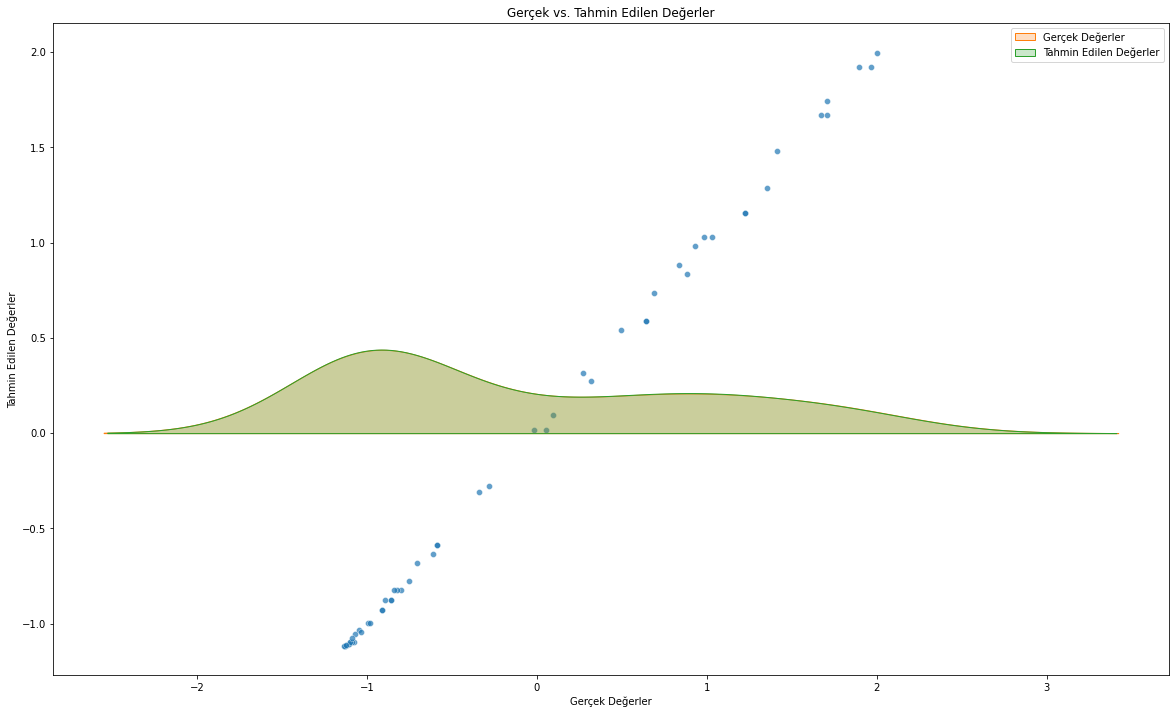

In [89]:
# Gerçek ve tahmin edilen değerleri içeren DataFrame
result_df = pd.DataFrame({'Gerçek Değerler': y_test, 'Tahmin Edilen Değerler': y_pred})

# Scatter plot çizimi
plt.figure(figsize=(20, 12))
sns.scatterplot(x='Gerçek Değerler', y='Tahmin Edilen Değerler', data=result_df, palette='viridis', edgecolor='w', alpha=0.7)
plt.title('Gerçek vs. Tahmin Edilen Değerler')
plt.xlabel('Gerçek Değerler')
plt.ylabel('Tahmin Edilen Değerler')

# Gerçek değerlerin yoğunluk grafiği
sns.kdeplot(result_df['Gerçek Değerler'], label='Gerçek Değerler', shade=True)

# Tahmin edilen değerlerin yoğunluk grafiği
sns.kdeplot(result_df['Tahmin Edilen Değerler'], label='Tahmin Edilen Değerler', shade=True)

plt.legend()
plt.show() 
# valla bu grafiği ben de anlamadım chatgpt yazdı

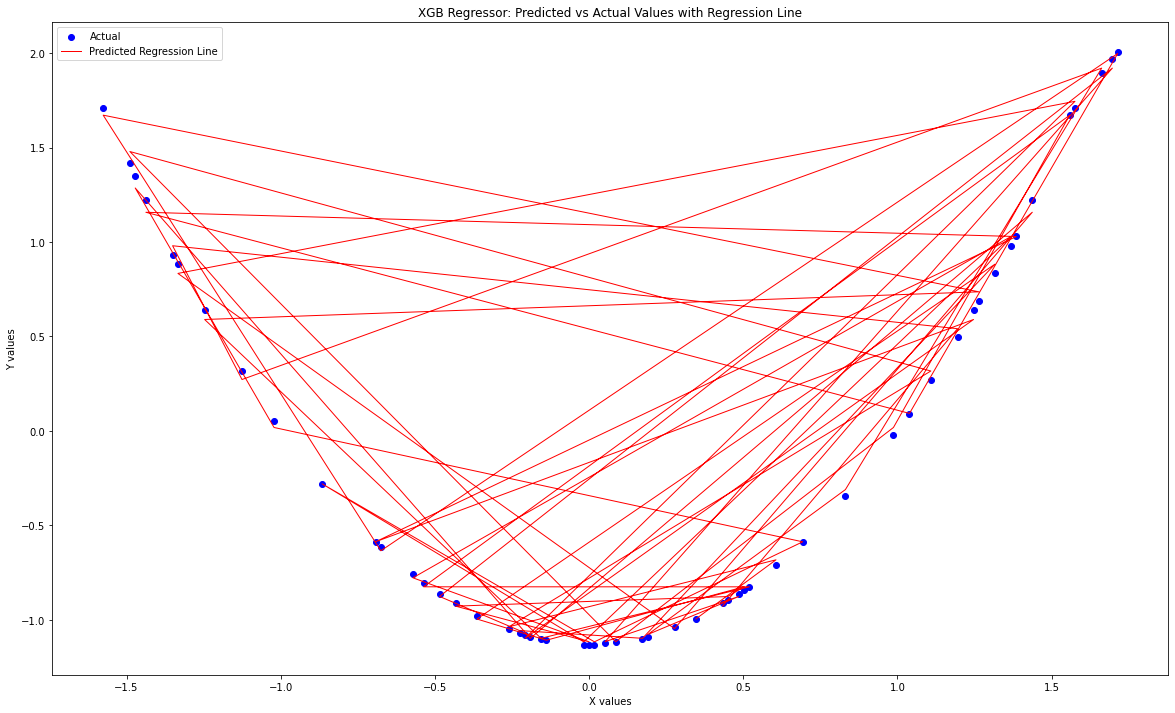

In [90]:
df_results = pd.DataFrame({'Predicted': y_pred, 'Actual': y_test})

plt.figure(figsize=(20, 12))
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', linewidth=1, label='Predicted Regression Line')
plt.xlabel('X values')
plt.ylabel('Y values')
plt.title('XGB Regressor: Predicted vs Actual Values with Regression Line')
plt.legend()
plt.show()


### GradientBoost

[[-1.   -1.  ]
 [-0.73 -0.71]
 [-1.04 -1.05]
 [ 0.23  0.27]
 [ 1.48  1.42]
 [-1.11 -1.12]
 [-0.06 -0.02]
 [ 1.67  1.67]
 [-0.78 -0.8 ]
 [-0.83 -0.83]
 [-1.1  -1.1 ]
 [ 0.59  0.64]
 [ 0.73  0.69]
 [ 1.67  1.71]
 [-0.59 -0.61]
 [ 2.03  2.  ]
 [ 0.09  0.09]
 [ 1.16  1.22]
 [ 1.03  1.03]
 [-0.59 -0.59]
 [ 0.59  0.64]
 [-1.06 -1.08]
 [ 1.67  1.71]
 [ 0.83  0.88]
 [-1.05 -1.04]
 [ 1.16  1.22]
 [-1.1  -1.09]
 [ 1.29  1.35]
 [ 0.09  0.06]
 [-0.59 -0.59]
 [-1.11 -1.13]
 [-0.28 -0.28]
 [-1.11 -1.13]
 [ 1.03  0.98]
 [-0.78 -0.75]
 [-1.11 -1.13]
 [-0.93 -0.91]
 [-0.88 -0.89]
 [-0.83 -0.84]
 [-1.1  -1.11]
 [-0.96 -0.98]
 [ 0.88  0.83]
 [-1.1  -1.1 ]
 [-1.06 -1.07]
 [-0.84 -0.86]
 [ 1.92  1.97]
 [-1.11 -1.12]
 [-0.88 -0.86]
 [-1.08 -1.09]
 [-0.31 -0.34]
 [ 1.92  1.89]
 [ 0.36  0.32]
 [ 0.98  0.93]
 [ 0.45  0.5 ]
 [-0.93 -0.91]]
0.9990343083409639
TEST SET
MAE:                 0.008511490321600446
RMSE:                0.01673517767070425
MAPE:                2.3519705257802723
r2:                  0.

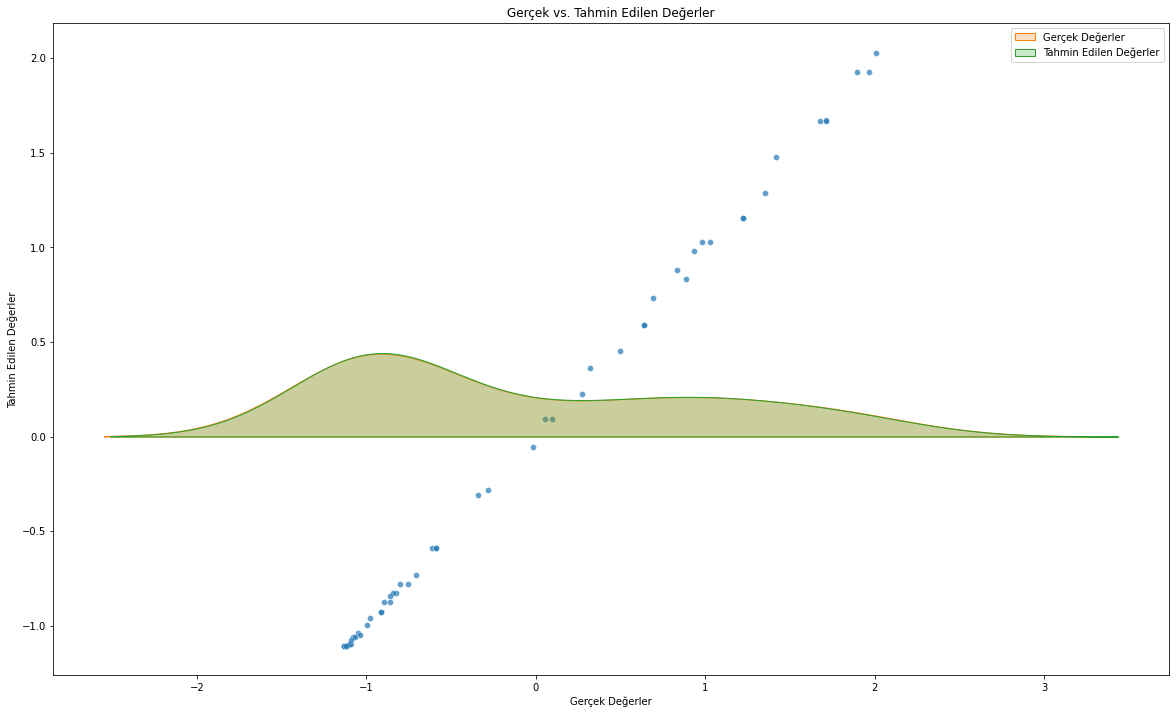

In [91]:
gb_reg = GradientBoostingRegressor(random_state=42,n_estimators=220,criterion='squared_error', learning_rate = 0.03)

gb_reg.fit(X_train, y_train)

y_pred = gb_reg.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))


print(r2_score(y_test, y_pred))

# Use test and show results of test set
y_hat = gb_reg.predict(X)
mae = metrics.mean_absolute_error(y,y_hat)
mse = metrics.mean_squared_error(y,y_hat)
mape = np.mean(np.abs((y - y_hat) / y)) * 100

print ("TEST SET")
print ("========")
print ("MAE:                ", mae)
print ("RMSE:               ", math.sqrt(mse))
print ("MAPE:               ", mape)
print ("r2:                 ", gb_reg.score(X,y))


# Gerçek ve tahmin edilen değerleri içeren DataFrame
result_df = pd.DataFrame({'Gerçek Değerler': y_test, 'Tahmin Edilen Değerler': y_pred})

# Scatter plot çizimi
plt.figure(figsize=(20, 12))
sns.scatterplot(x='Gerçek Değerler', y='Tahmin Edilen Değerler', data=result_df, palette='viridis', edgecolor='w', alpha=0.7)
plt.title('Gerçek vs. Tahmin Edilen Değerler')
plt.xlabel('Gerçek Değerler')
plt.ylabel('Tahmin Edilen Değerler')

# Gerçek değerlerin yoğunluk grafiği
sns.kdeplot(result_df['Gerçek Değerler'], label='Gerçek Değerler', shade=True)

# Tahmin edilen değerlerin yoğunluk grafiği
sns.kdeplot(result_df['Tahmin Edilen Değerler'], label='Tahmin Edilen Değerler', shade=True)

plt.legend()
plt.show() 
# valla bu grafiği ben de anlamadım chatgpt yazdı

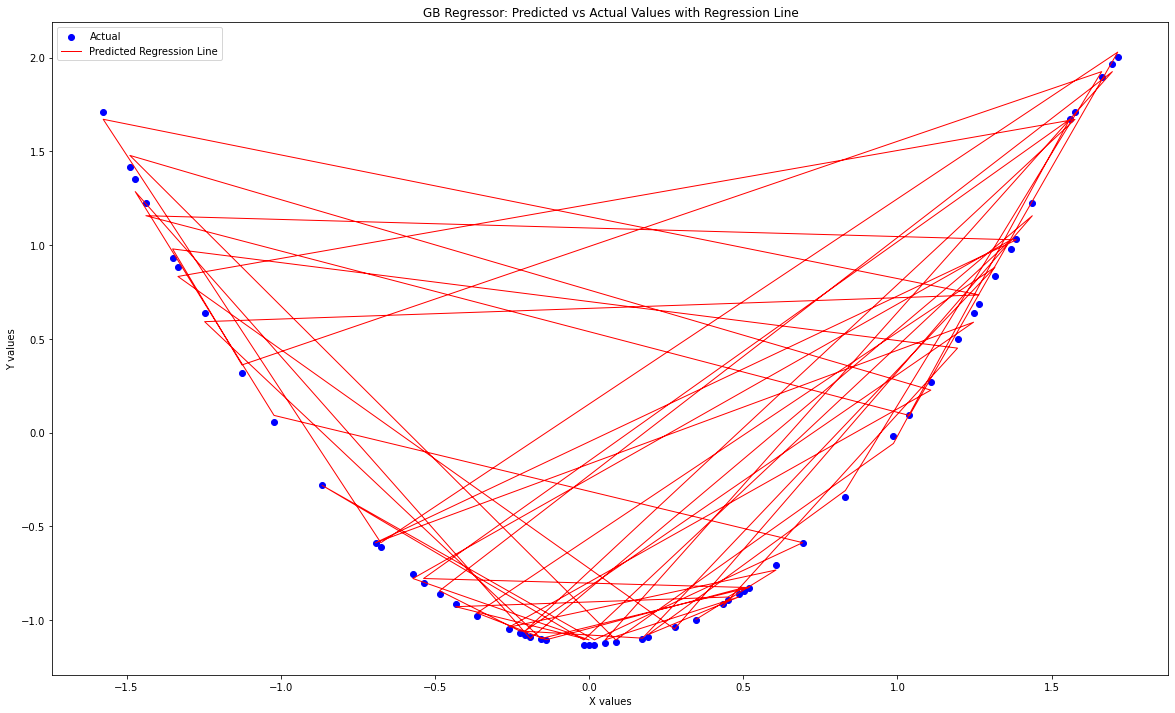

In [92]:
df_results = pd.DataFrame({'Predicted': y_pred, 'Actual': y_test})

plt.figure(figsize=(20, 12))
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', linewidth=1, label='Predicted Regression Line')
plt.xlabel('X values')
plt.ylabel('Y values')
plt.title('GB Regressor: Predicted vs Actual Values with Regression Line')
plt.legend()
plt.show()


### Support Vector Regressor

[[-0.98 -1.  ]
 [-0.75 -0.71]
 [-1.02 -1.05]
 [ 0.28  0.27]
 [ 1.4   1.42]
 [-1.07 -1.12]
 [-0.04 -0.02]
 [ 1.59  1.67]
 [-0.83 -0.8 ]
 [-0.85 -0.83]
 [-1.06 -1.1 ]
 [ 0.68  0.64]
 [ 0.74  0.69]
 [ 1.64  1.71]
 [-0.65 -0.61]
 [ 1.96  2.  ]
 [ 0.09  0.09]
 [ 1.25  1.22]
 [ 1.1   1.03]
 [-0.63 -0.59]
 [ 0.68  0.64]
 [-1.04 -1.08]
 [ 1.64  1.71]
 [ 0.94  0.88]
 [-1.02 -1.04]
 [ 1.25  1.22]
 [-1.05 -1.09]
 [ 1.35  1.35]
 [ 0.05  0.06]
 [-0.63 -0.59]
 [-1.08 -1.13]
 [-0.32 -0.28]
 [-1.08 -1.13]
 [ 1.05  0.98]
 [-0.79 -0.75]
 [-1.08 -1.13]
 [-0.92 -0.91]
 [-0.91 -0.89]
 [-0.86 -0.84]
 [-1.06 -1.11]
 [-0.97 -0.98]
 [ 0.89  0.83]
 [-1.06 -1.1 ]
 [-1.04 -1.07]
 [-0.88 -0.86]
 [ 1.92  1.97]
 [-1.08 -1.12]
 [-0.88 -0.86]
 [-1.05 -1.09]
 [-0.39 -0.34]
 [ 1.85  1.89]
 [ 0.33  0.32]
 [ 0.99  0.93]
 [ 0.53  0.5 ]
 [-0.92 -0.91]]
0.9984760299005035
TEST SET
MAE:                 0.035354061158747674
RMSE:                0.04001159009393045
MAPE:                7.3406377389477
r2:                  0.998

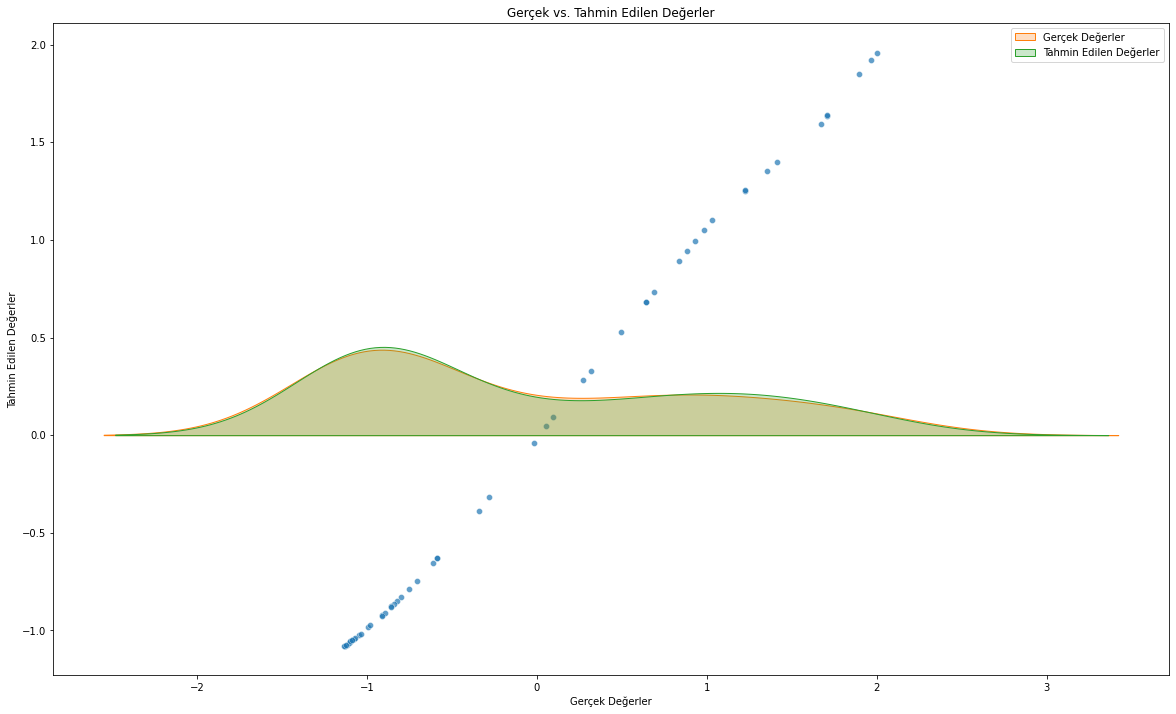

In [93]:
svr_reg = SVR(kernel = 'rbf', degree= 24, epsilon = 0.05)


svr_reg.fit(X_train, y_train)

y_pred = svr_reg.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))


print(r2_score(y_test, y_pred))


# Use test and show results of test set
y_hat = svr_reg.predict(X)
mae = metrics.mean_absolute_error(y,y_hat)
mse = metrics.mean_squared_error(y,y_hat)
mape = np.mean(np.abs((y - y_hat) / y)) * 100

print ("TEST SET")
print ("========")
print ("MAE:                ", mae)
print ("RMSE:               ", math.sqrt(mse))
print ("MAPE:               ", mape)
print ("r2:                 ", svr_reg.score(X,y))



# Gerçek ve tahmin edilen değerleri içeren DataFrame
result_df = pd.DataFrame({'Gerçek Değerler': y_test, 'Tahmin Edilen Değerler': y_pred})

# Scatter plot çizimi
plt.figure(figsize=(20, 12))
sns.scatterplot(x='Gerçek Değerler', y='Tahmin Edilen Değerler', data=result_df, palette='viridis', edgecolor='w', alpha=0.7)
plt.title('Gerçek vs. Tahmin Edilen Değerler')
plt.xlabel('Gerçek Değerler')
plt.ylabel('Tahmin Edilen Değerler')

# Gerçek değerlerin yoğunluk grafiği
sns.kdeplot(result_df['Gerçek Değerler'], label='Gerçek Değerler', shade=True)

# Tahmin edilen değerlerin yoğunluk grafiği
sns.kdeplot(result_df['Tahmin Edilen Değerler'], label='Tahmin Edilen Değerler', shade=True)

plt.legend()
plt.show() 

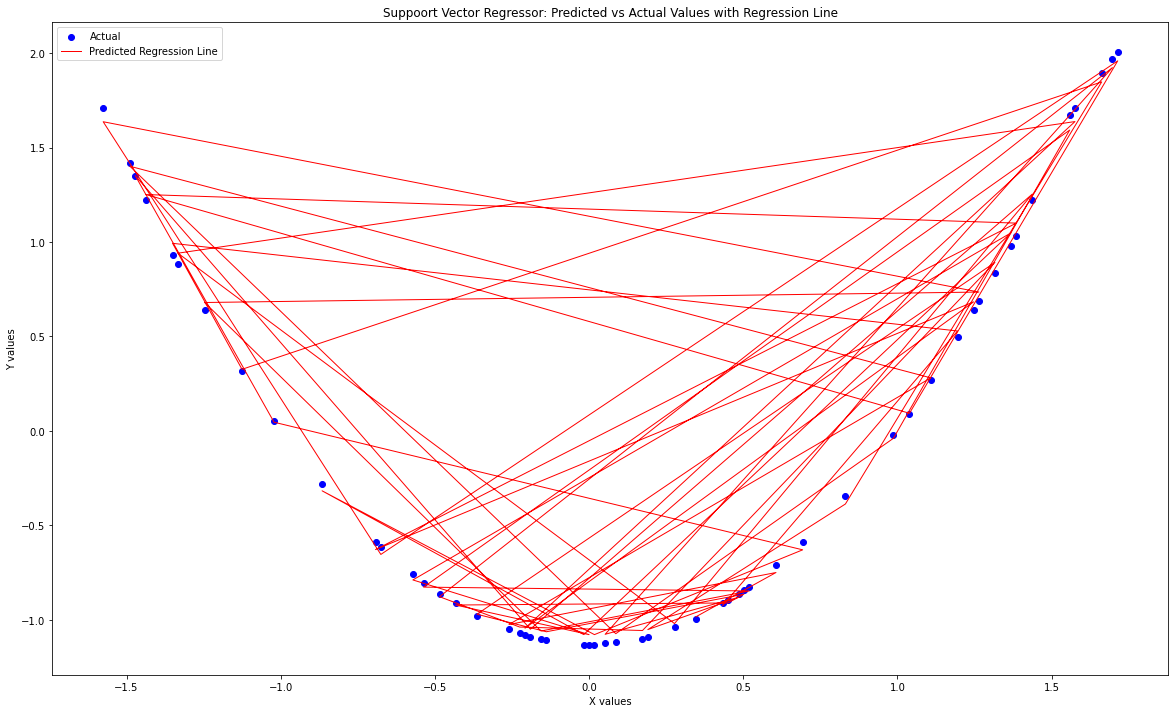

In [94]:
df_results = pd.DataFrame({'Predicted': y_pred, 'Actual': y_test})

plt.figure(figsize=(20, 12))
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', linewidth=1, label='Predicted Regression Line')
plt.xlabel('X values')
plt.ylabel('Y values')
plt.title('Suppoort Vector Regressor: Predicted vs Actual Values with Regression Line')
plt.legend()
plt.show()


[[-0.25 -1.  ]
 [-0.25 -0.71]
 [-0.25 -1.05]
 [-0.35  0.27]
 [ 0.58  1.42]
 [-0.25 -1.12]
 [-0.29 -0.02]
 [-1.38  1.67]
 [-0.25 -0.8 ]
 [-0.25 -0.83]
 [-0.25 -1.1 ]
 [-0.01  0.64]
 [-0.51  0.69]
 [ 0.97  1.71]
 [-0.24 -0.61]
 [-2.45  2.  ]
 [-0.31  0.09]
 [ 0.39  1.22]
 [-0.74  1.03]
 [-0.24 -0.59]
 [-0.48  0.64]
 [-0.25 -1.08]
 [-1.47  1.71]
 [ 0.13  0.88]
 [-0.25 -1.04]
 [-0.89  1.22]
 [-0.25 -1.09]
 [ 0.51  1.35]
 [-0.19  0.06]
 [-0.25 -0.59]
 [-0.25 -1.13]
 [-0.23 -0.28]
 [-0.25 -1.13]
 [-0.7   0.98]
 [-0.25 -0.75]
 [-0.25 -1.13]
 [-0.25 -0.91]
 [-0.25 -0.89]
 [-0.25 -0.84]
 [-0.25 -1.11]
 [-0.25 -0.98]
 [-0.59  0.83]
 [-0.25 -1.1 ]
 [-0.25 -1.07]
 [-0.25 -0.86]
 [-2.3   1.97]
 [-0.25 -1.12]
 [-0.25 -0.86]
 [-0.25 -1.09]
 [-0.26 -0.34]
 [-2.02  1.89]
 [-0.13  0.32]
 [ 0.17  0.93]
 [-0.42  0.5 ]
 [-0.25 -0.91]]
-0.8205635942714327
TEST SET
MAE:                 0.8449537317895627
RMSE:                1.1995999410774312
MAPE:                128.5379683207769
r2:                  -0.43

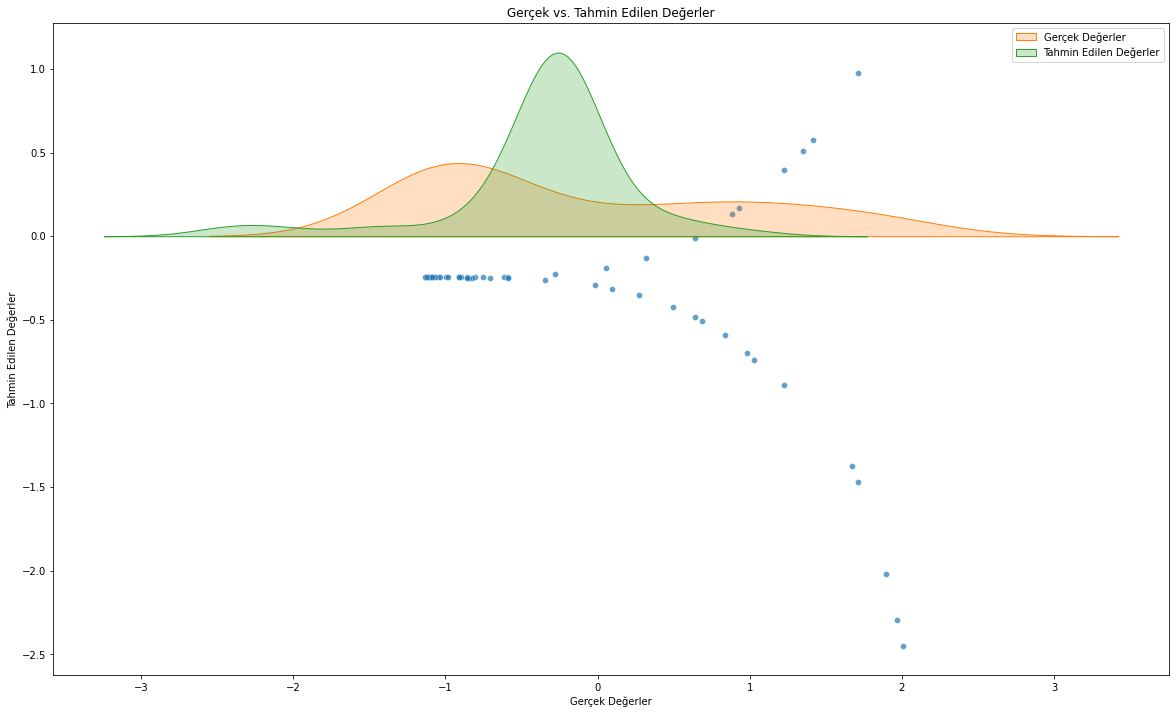

In [95]:
svr_reg = SVR(kernel = 'poly', degree= 7, epsilon = 0.05)


svr_reg.fit(X_train, y_train)

y_pred = svr_reg.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))


print(r2_score(y_test, y_pred))


# Use test and show results of test set
y_hat = svr_reg.predict(X)
mae = metrics.mean_absolute_error(y,y_hat)
mse = metrics.mean_squared_error(y,y_hat)
mape = np.mean(np.abs((y - y_hat) / y)) * 100

print ("TEST SET")
print ("========")
print ("MAE:                ", mae)
print ("RMSE:               ", math.sqrt(mse))
print ("MAPE:               ", mape)
print ("r2:                 ", svr_reg.score(X,y))



# Gerçek ve tahmin edilen değerleri içeren DataFrame
result_df = pd.DataFrame({'Gerçek Değerler': y_test, 'Tahmin Edilen Değerler': y_pred})

# Scatter plot çizimi
plt.figure(figsize=(20, 12))
sns.scatterplot(x='Gerçek Değerler', y='Tahmin Edilen Değerler', data=result_df, palette='viridis', edgecolor='w', alpha=0.7)
plt.title('Gerçek vs. Tahmin Edilen Değerler')
plt.xlabel('Gerçek Değerler')
plt.ylabel('Tahmin Edilen Değerler')

# Gerçek değerlerin yoğunluk grafiği
sns.kdeplot(result_df['Gerçek Değerler'], label='Gerçek Değerler', shade=True)

# Tahmin edilen değerlerin yoğunluk grafiği
sns.kdeplot(result_df['Tahmin Edilen Değerler'], label='Tahmin Edilen Değerler', shade=True)

plt.legend()
plt.show() 

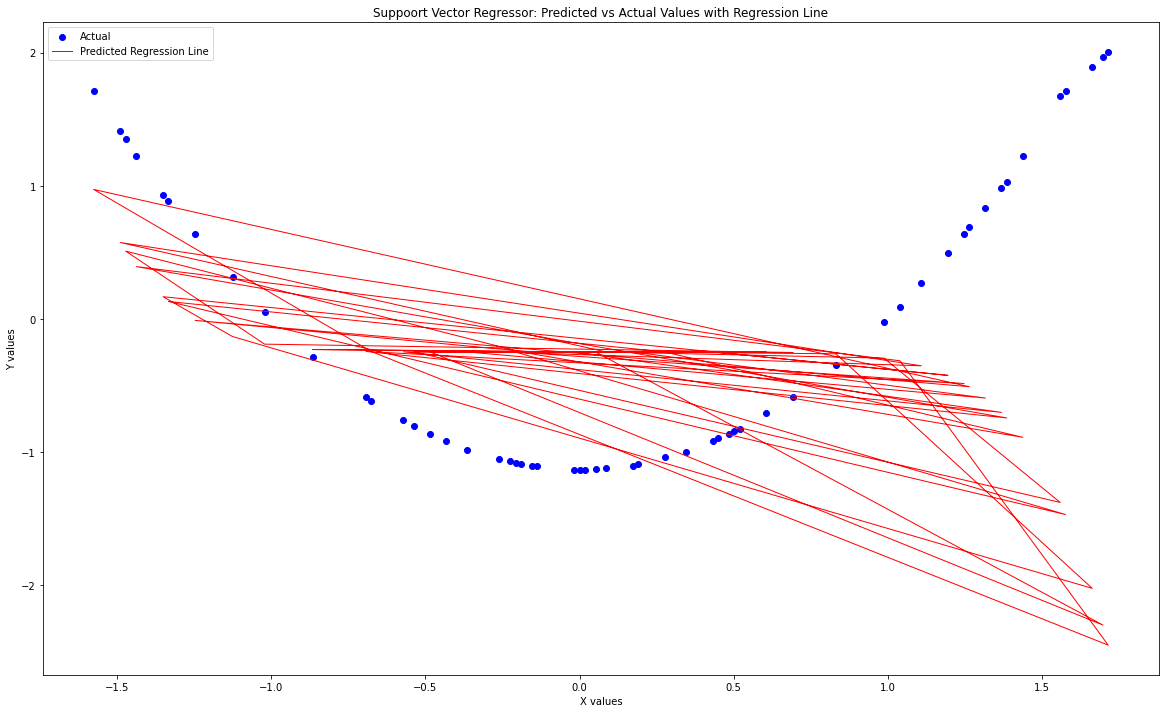

In [96]:
df_results = pd.DataFrame({'Predicted': y_pred, 'Actual': y_test})

plt.figure(figsize=(20, 12))
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', linewidth=1, label='Predicted Regression Line')
plt.xlabel('X values')
plt.ylabel('Y values')
plt.title('Suppoort Vector Regressor: Predicted vs Actual Values with Regression Line')
plt.legend()
plt.show()


### Parametreler hoş olmadı. GridSearch ile karar verelim:

param_grid = {'C': [1, 10, 20, 50, 100, 1000],
              'epsilon': [0.001, 0.003, 0.01, 0.03, 0.1, 0.25],
              'degree': [3, 5, 7, 9]}

# GridSearchCV ile en iyi parametreleri bulun
grid_search = GridSearchCV(SVR(kernel='poly'), param_grid, cv=5)
grid_search.fit(X_train, y_train)

# En iyi parametreleri ekrana yazdırın
print("En iyi parametreler: ", grid_search.best_params_)

# En iyi modeli kullanarak tahmin yapın
y_pred_tuned = grid_search.predict(X_test)

R2 Score (Polynomial Regression):  0.9995696001014225
MAE (Polynomial Regression):  0.01539954815568063
RMSE (Polynomial Regression):  0.021641827559704976
MAPE (Polynomial Regression):  2.091241022779825


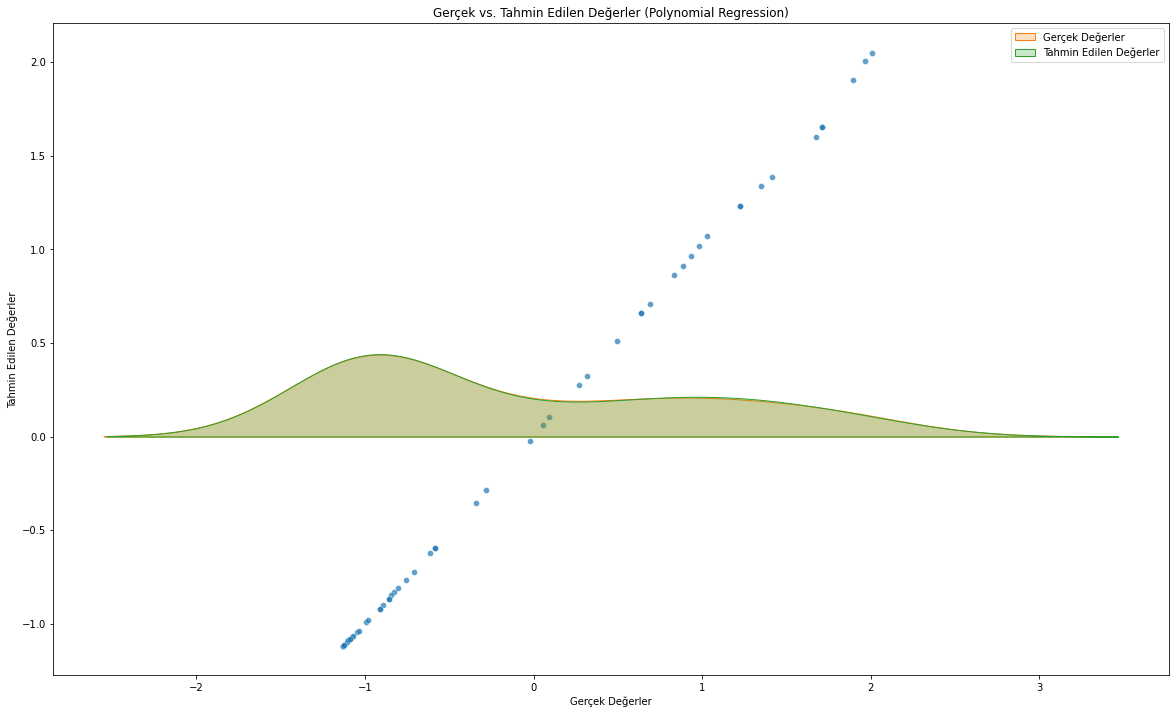

In [97]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

# PolynomialFeatures ile özellikleri genişletme
poly = PolynomialFeatures(degree=7)
X_poly = poly.fit_transform(X)

# Lineer Regresyon modeli oluşturma
poly_reg = make_pipeline(PolynomialFeatures(7), LinearRegression())
poly_reg.fit(X, y)

# Tahminler yapma
y_pred_poly = poly_reg.predict(X_test)

# Skorları ekrana yazdırma
print("R2 Score (Polynomial Regression): ", r2_score(y_test, y_pred_poly))
print("MAE (Polynomial Regression): ", metrics.mean_absolute_error(y_test, y_pred_poly))
print("RMSE (Polynomial Regression): ", math.sqrt(metrics.mean_squared_error(y_test, y_pred_poly)))
print("MAPE (Polynomial Regression): ", np.mean(np.abs((y_test - y_pred_poly) / y_test)) * 100)

# Gerçek ve tahmin edilen değerleri içeren DataFrame
result_df_poly = pd.DataFrame({'Gerçek Değerler': y_test, 'Tahmin Edilen Değerler': y_pred_poly})

# Scatter plot çizimi
plt.figure(figsize=(20, 12))
sns.scatterplot(x='Gerçek Değerler', y='Tahmin Edilen Değerler', data=result_df_poly, palette='viridis', edgecolor='w', alpha=0.7)
plt.title('Gerçek vs. Tahmin Edilen Değerler (Polynomial Regression)')
plt.xlabel('Gerçek Değerler')
plt.ylabel('Tahmin Edilen Değerler')

# Gerçek değerlerin yoğunluk grafiği
sns.kdeplot(result_df_poly['Gerçek Değerler'], label='Gerçek Değerler', shade=True)

# Tahmin edilen değerlerin yoğunluk grafiği
sns.kdeplot(result_df_poly['Tahmin Edilen Değerler'], label='Tahmin Edilen Değerler', shade=True)

plt.legend()
plt.show()


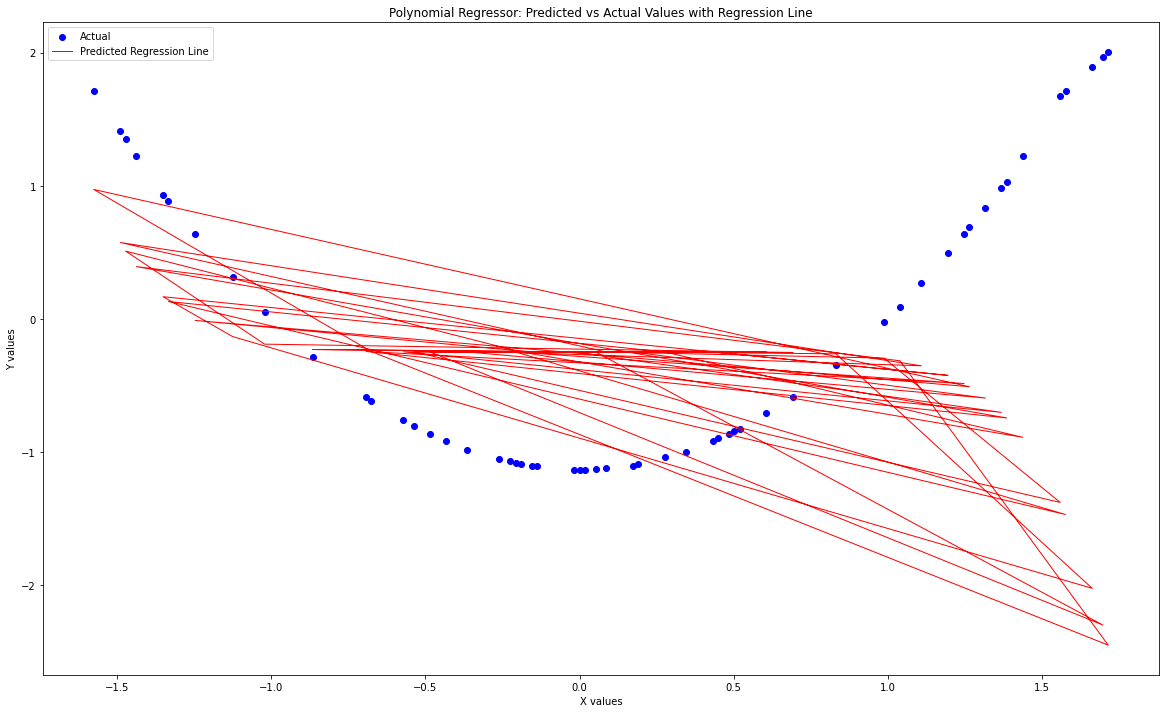

In [98]:
df_results = pd.DataFrame({'Predicted': y_pred, 'Actual': y_test})

plt.figure(figsize=(20, 12))
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', linewidth=1, label='Predicted Regression Line')
plt.xlabel('X values')
plt.ylabel('Y values')
plt.title('Polynomial Regressor: Predicted vs Actual Values with Regression Line')
plt.legend()
plt.show()


In [99]:
from keras.models import Sequential
from keras.layers import Dense

mlp = Sequential()
mlp.add(Dense(units=8, kernel_initializer='uniform', activation = 'relu', input_dim = 1))
mlp.add(Dense(units=16, kernel_initializer='uniform', activation = 'relu'))
mlp.add(Dense(units=1, kernel_initializer='uniform', activation = 'linear'))

mlp.compile(optimizer = 'adam', loss =  'mean_squared_error' , metrics = ['mae'] )
mlp.fit(X_train, y_train,epochs=50, batch_size=32, validation_split=0.1)

y_pred = mlp.predict(X_test)

Epoch 1/50
5/5 [==============================] - 0s 28ms/step - loss: 0.9411 - mae: 0.8154 - val_loss: 1.2108 - val_mae: 1.0316
Epoch 2/50
5/5 [==============================] - 0s 7ms/step - loss: 0.9405 - mae: 0.8155 - val_loss: 1.2115 - val_mae: 1.0320
Epoch 3/50
5/5 [==============================] - 0s 8ms/step - loss: 0.9400 - mae: 0.8155 - val_loss: 1.2119 - val_mae: 1.0323
Epoch 4/50
5/5 [==============================] - 0s 7ms/step - loss: 0.9395 - mae: 0.8156 - val_loss: 1.2121 - val_mae: 1.0326
Epoch 5/50
5/5 [==============================] - 0s 7ms/step - loss: 0.9388 - mae: 0.8156 - val_loss: 1.2122 - val_mae: 1.0328
Epoch 6/50
5/5 [==============================] - 0s 8ms/step - loss: 0.9379 - mae: 0.8155 - val_loss: 1.2121 - val_mae: 1.0328
Epoch 7/50
5/5 [==============================] - 0s 8ms/step - loss: 0.9369 - mae: 0.8155 - val_loss: 1.2117 - val_mae: 1.0329
Epoch 8/50
5/5 [==============================] - 0s 7ms/step - loss: 0.9352 - mae: 0.8149 - val_loss: 

In [65]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

y_pred = mlp.predict(X_test)

# R-squared (r2) değeri
r2 = r2_score(y_test, y_pred)
print(f'R-squared (r2): {r2}')

# Root Mean Squared Error (RMSE) değeri
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'RMSE: {rmse}')

# Mean Absolute Error (MAE) değeri
mae = mean_absolute_error(y_test, y_pred)
print(f'MAE: {mae}')

# Mean Absolute Percentage Error (MAPE) değeri
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print(f'MAPE: {mape}')

2/2 [==============================] - 0s 2ms/step
R-squared (r2): 0.9963416518059476
RMSE: 0.05730134595470893
MAE: 0.04841492393864653
MAPE: 3086320194.8560557


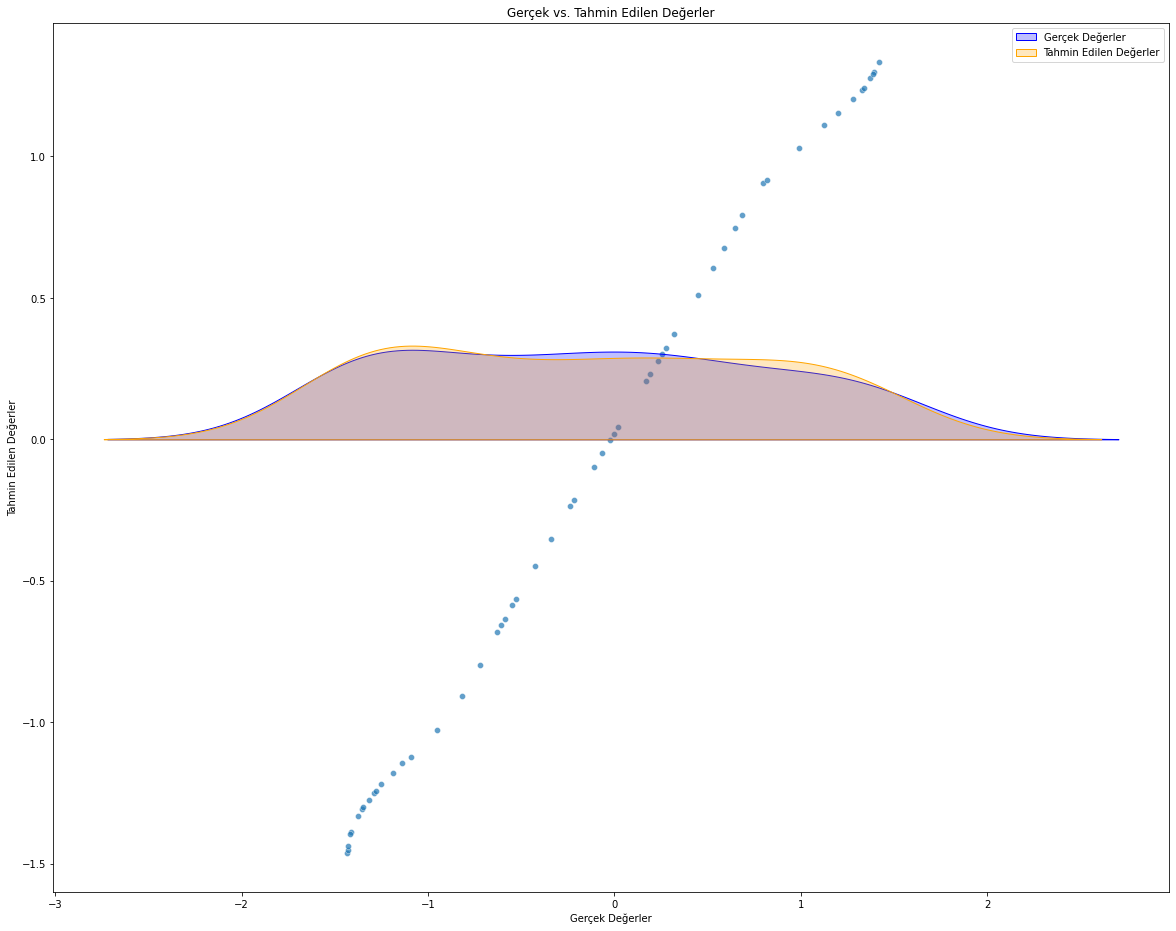

In [66]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# result_df isminde bir DataFrame oluşturulduğunu varsayalım
result_df = pd.DataFrame({'Gerçek Değerler': y_test.flatten(), 'Tahmin Edilen Değerler': y_pred.flatten()})

# Scatter plot ve yoğunluk grafiği çizimi
plt.figure(figsize=(20, 16))

# Scatter plot
sns.scatterplot(x='Gerçek Değerler', y='Tahmin Edilen Değerler', data=result_df, palette='viridis', edgecolor='w', alpha=0.7)

# Gerçek değerlerin yoğunluk grafiği
sns.kdeplot(result_df['Gerçek Değerler'], label='Gerçek Değerler', color='blue', shade=True)

# Tahmin edilen değerlerin yoğunluk grafiği
sns.kdeplot(result_df['Tahmin Edilen Değerler'], label='Tahmin Edilen Değerler', color='orange', shade=True)

plt.title('Gerçek vs. Tahmin Edilen Değerler')
plt.xlabel('Gerçek Değerler')
plt.ylabel('Tahmin Edilen Değerler')

plt.legend()
plt.show()


Epoch 1/50
5/5 [==============================] - 0s 14ms/step - loss: 0.0035 - mae: 0.0509 - val_loss: 0.0033 - val_mae: 0.0470
Epoch 2/50
5/5 [==============================] - 0s 7ms/step - loss: 0.0032 - mae: 0.0491 - val_loss: 0.0029 - val_mae: 0.0437
Epoch 3/50
5/5 [==============================] - 0s 8ms/step - loss: 0.0030 - mae: 0.0476 - val_loss: 0.0026 - val_mae: 0.0411
Epoch 4/50
5/5 [==============================] - 0s 7ms/step - loss: 0.0028 - mae: 0.0463 - val_loss: 0.0023 - val_mae: 0.0386
Epoch 5/50
5/5 [==============================] - 0s 7ms/step - loss: 0.0026 - mae: 0.0449 - val_loss: 0.0021 - val_mae: 0.0368
Epoch 6/50
5/5 [==============================] - 0s 7ms/step - loss: 0.0025 - mae: 0.0435 - val_loss: 0.0019 - val_mae: 0.0347
Epoch 7/50
5/5 [==============================] - 0s 7ms/step - loss: 0.0023 - mae: 0.0421 - val_loss: 0.0017 - val_mae: 0.0326
Epoch 8/50
5/5 [==============================] - 0s 7ms/step - loss: 0.0022 - mae: 0.0405 - val_loss: 

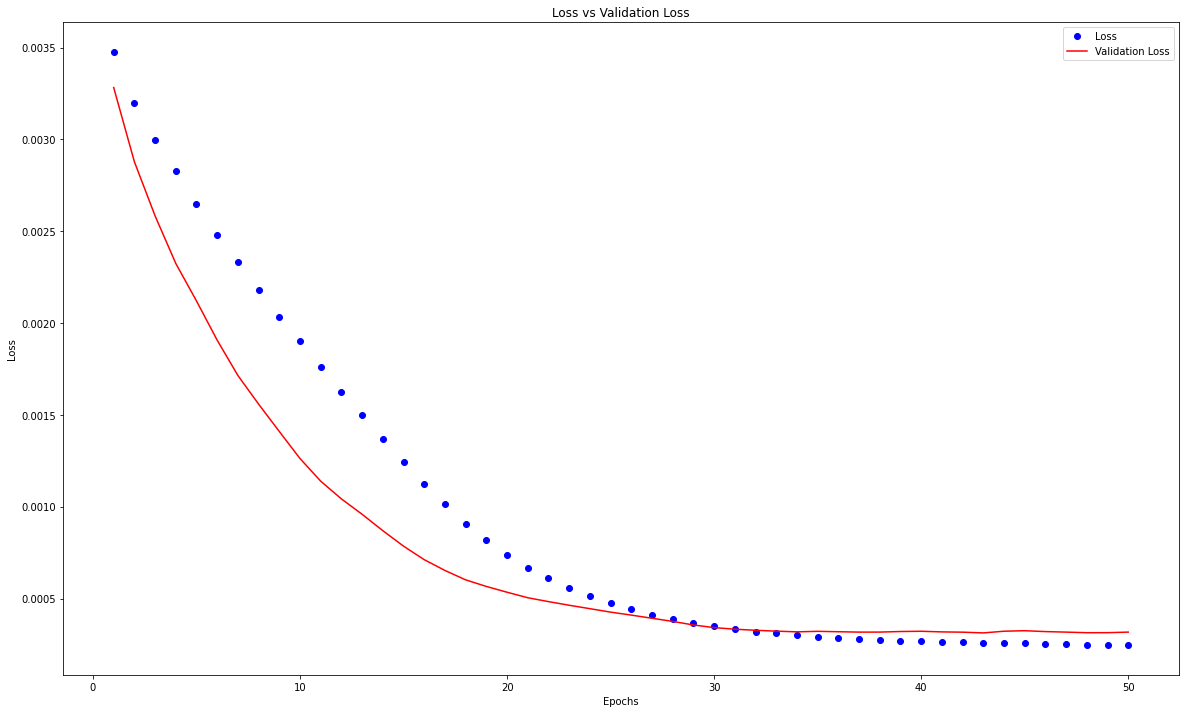

In [67]:
# Modelin eğitim sırasında kayıp (loss) ve doğrulama kaybı (validation loss) değerleri
history = mlp.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1)

# Modelin eğitim sürecindeki kayıp (loss) değerleri
loss = history.history['loss']

# Modelin eğitim sürecindeki doğrulama kaybı (validation loss) değerleri
val_loss = history.history['val_loss']

# Eğitim ve doğrulama kaybı grafiği çizimi
epochs = range(1, len(loss) + 1)

plt.figure(figsize=(20, 12))

plt.plot(epochs, loss, 'bo', label='Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Loss vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()